In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import json

In [2]:
test_results_dir = "../../core/build/test-results/jmc-report/"

def read_test_results(file_path):
    data = {
        "random": {},
        "trust": {},
    }
    for dir in os.listdir(file_path):
        if dir.startswith("random"):
            num_threads = int(dir.split("-")[1])
            with open(os.path.join(file_path, dir, "coverage.json")) as f:
                data["random"][num_threads] = json.load(f)
        elif dir.startswith("trust"):
            num_threads = int(dir.split("-")[1])
            with open(os.path.join(file_path, dir, "coverage.json")) as f:
                data["trust"][num_threads] = json.load(f)
    return data

test_data = read_test_results(test_results_dir)
test_data

{'random': {5: {'time': 240029,
   'coverage': [312,
    579,
    792,
    975,
    1132,
    1288,
    1430,
    1570,
    1715,
    1827,
    1943,
    2024,
    2118,
    2198,
    2264,
    2347,
    2431,
    2531,
    2609,
    2678,
    2752,
    2813,
    2875,
    2935,
    2994,
    3061,
    3125,
    3184,
    3238,
    3297,
    3352,
    3404,
    3465,
    3515,
    3565,
    3627,
    3691,
    3747,
    3800,
    3857,
    3899,
    3957,
    4008,
    4056,
    4095,
    4131,
    4168,
    4214,
    4257,
    4296,
    4337,
    4381,
    4419,
    4457,
    4489,
    4526,
    4557,
    4593,
    4630,
    4659,
    4689,
    4731,
    4763,
    4797,
    4846,
    4883,
    4912,
    4947,
    4991,
    5029,
    5056,
    5095,
    5125,
    5152,
    5173,
    5200,
    5227,
    5267,
    5301,
    5335,
    5362,
    5393,
    5426,
    5462,
    5486,
    5521,
    5557,
    5588,
    5609,
    5635,
    5660,
    5691,
    5718,
    5744,
    5772,
    5809,


In [ ]:
# Adding custom data for trust (without measuring coverage and assuming fixed cost per iteration)

# test_data["trust"][6] = {
#     'time': 992000,
#     'coverage': np.linspace(0, 518400, 992)
# }

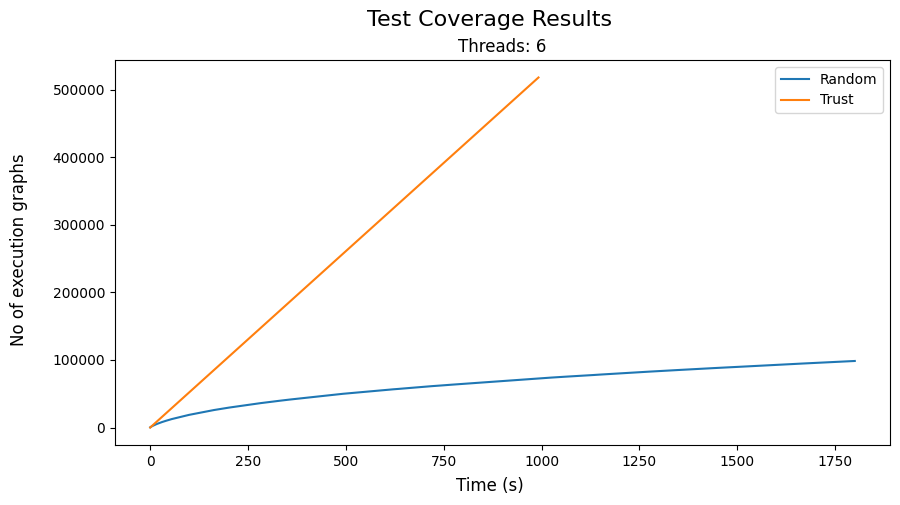

In [ ]:
def plot_test_data(data):
    num_plots = len(data["random"].keys())
    fig, axs = plt.subplots(num_plots, 1, figsize=(10, 5 * num_plots))

    fig.suptitle("Test Coverage Results", fontsize=16)

    BASE_THREADS_OFFSET = 4

    for (threads,cov_data) in data["random"].items():
        total_time = cov_data["time"]/1000
        iterations = len(cov_data["coverage"])
        coverage = np.array(cov_data["coverage"])
        x = np.linspace(0, total_time, iterations)
        if num_plots > 1:
            axs[threads-BASE_THREADS_OFFSET].plot(x, coverage, label="Random")
            axs[threads-BASE_THREADS_OFFSET].set_title(f"Threads: {threads}")
        else:
            axs.plot(x, coverage, label="Random")
            axs.set_title(f"Threads: {threads}")
    
    for (threads,cov_data) in data["trust"].items():
        total_time = cov_data["time"]/1000
        iterations = len(cov_data["coverage"])
        coverage = np.array(cov_data["coverage"])
        x = np.linspace(0, total_time, iterations)
        if num_plots > 1:
            axs[threads-BASE_THREADS_OFFSET].plot(x, coverage, label="Trust")
        else:
            axs.plot(x, coverage, label="Trust")
    
    if num_plots > 1:
        for ax in axs:
            ax.legend()
            ax.set_xlabel("Time(s)")
            ax.set_ylabel("No of executions graphs")

    plt.legend()
    plt.savefig("test_coverage_results.png")

plot_test_data(test_data)
